In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataSet = pd.read_csv("bank-full.csv")
dataSet.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
print ("Following is the data type of each attribute in the given dataSet: \n") 
dataSet.info()

Following is the data type of each attribute in the given dataSet: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


From the above information about the attributes of the dataset none of the attribute hold any null/ missing values. Also, the data is of integer or object type that is a categorical type of data throughout the data set.

In [4]:
print ("The dimension of the given dataset is: ")
dataSet.shape

The dimension of the given dataset is: 


(45211, 17)

In [5]:
print ("The 5 point summary of the numerical data from the given banking dataset is as followed: ")
dataSet.describe()

The 5 point summary of the numerical data from the given banking dataset is as followed: 


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Let's plot boxplots of the above numerical dataSet to check if they have any outliers.


<function matplotlib.pyplot.show(*args, **kw)>

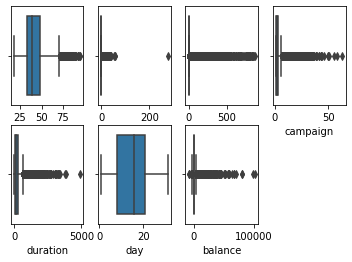

In [6]:
print ("Let's plot boxplots of the above numerical dataSet to check if they have any outliers.")
numeric_dataSet = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(1,8):
    mp.subplot(2,4,i)
    sb.boxplot(dataSet[numeric_dataSet[1-i]])

mp.show

From the above grid it is evident that every numerical axis has outliers except for day attribute. Hence, we'll do an outlier treatment using the IQR score for every attribute as followed:

In [7]:
#Treating the outliers using the IQR method:
Q1 = dataSet.quantile(0.25)
Q3 = dataSet.quantile(0.75)
IQR = Q3 - Q1

print ("IQR of the dataSet is: \n")
print (IQR)

IQR of the dataSet is: 

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


From the above IQR, the IQR of pdays and previous is 0 that is the data is too much distributed and mean is not in the centre of the distibution and hence the outliers of these attributes won't be treated.

In [8]:
print(dataSet < (Q1-1.5*IQR)) or (dataSet > (Q3+1.5*IQR))

       Target    age  balance  campaign  contact    day  default  duration  \
0       False  False    False     False    False  False    False     False   
1       False  False    False     False    False  False    False     False   
2       False  False    False     False    False  False    False     False   
3       False  False    False     False    False  False    False     False   
4       False  False    False     False    False  False    False     False   
...       ...    ...      ...       ...      ...    ...      ...       ...   
45206   False  False    False     False    False  False    False     False   
45207   False  False    False     False    False  False    False     False   
45208   False  False    False     False    False  False    False     False   
45209   False  False    False     False    False  False    False     False   
45210   False  False    False     False    False  False    False     False   

       education  housing    job   loan  marital  month  pdays 

,Target,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
45207,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


From the above table, True indicates there is an outlier present while False indicate that the value is valid.

In [9]:
dataSet_withOutliers = dataSet.drop(['pdays','previous'],axis=1)

In [10]:
dataSet_withoutOutliers= dataSet_withOutliers[~((dataSet < (Q1 - 1.5 * IQR)) |(dataSet > (Q3 + 1.5 * IQR))).any(axis=1)]
#dataSet = pd.concat([dataSet['pdays','previous'], dataSet_withoutOutliers], axis =1)
dataSet_withoutOutliers['pdays'] = dataSet['pdays']
dataSet_withoutOutliers['previous'] = dataSet['previous']

dataSet_withoutOutliers.shape

W:\AIML_Labs\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
W:\AIML_Labs\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(28193, 17)

Now treating the non numeric data to make it favorable for futher model building, this process will assign every non-numeric category an integer. This will help in further processing of finding a correlation and model building and evaluation.

In [11]:
#From the given data set following attributes are non-numeric with data type as object: Job, Marital, Education, Default, Housing, Loan, Contact, Month, poutcome, Target.
#Converting this data type 'object' to 'categorical':
def objConverter(data):
    for attribute in data:
        if data[attribute].dtype =='object':
            data[attribute] = pd.Categorical(data[attribute])

    print ("Following dataSet has all the object type attributes converted to 'Categorical':\n")
    data.info()

In [12]:
#Following basic functions would be used to evaluate the models:
def create_confusionMat(test=[], pred=[]):
    confMatrix = metrics.confusion_matrix(test, pred, labels=[1, 0])
    confM_data = pd.DataFrame(confMatrix, index = [i for i in ['1', '0']],
                                        columns = [i for i in ['Predict 1', 'Predict 0']])
    sb.heatmap(confM_data, annot=True, )
    
def cal_accuracy(test = [], pred = []):
    print ("Accuracy of the model is: " + str(metrics.accuracy_score(test, pred)))
    
def classification_report_of_model(test=[], pred = []):
    print ("The classificaiton report of the model is: ")
    print (metrics.classification_report(test, pred, labels=[1, 0]))

def cal_AUC(model):
    prob = model.predict_proba(x_test)
    preds = prob[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr,tpr)
    print ("The area under the curve is: "+ str(roc_auc))
    return (roc_auc)

In [13]:
objConverter(dataSet)

Following dataSet has all the object type attributes converted to 'Categorical':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)

In [14]:
objConverter(dataSet_withoutOutliers)

W:\AIML_Labs\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Following dataSet has all the object type attributes converted to 'Categorical':

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28193 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        28193 non-null  int64   
 1   job        28193 non-null  category
 2   marital    28193 non-null  category
 3   education  28193 non-null  category
 4   default    28193 non-null  category
 5   balance    28193 non-null  int64   
 6   housing    28193 non-null  category
 7   loan       28193 non-null  category
 8   contact    28193 non-null  category
 9   day        28193 non-null  int64   
 10  month      28193 non-null  category
 11  duration   28193 non-null  int64   
 12  campaign   28193 non-null  int64   
 13  poutcome   28193 non-null  category
 14  Target     28193 non-null  category
 15  pdays      28193 non-null  int64   
 16  previous   28193 non-null  int64   
dtypes: category(10), int64(7)

Now there's no attribute with data type as 'object'. Now each of the categorical data will be assigned a numerical value to aid a numerical treatment and calculation of the dataset. Every categorical data will be assigned a unique number from 0 to n, depending on the categories that attribute hold. 

In [15]:
#The below dictionary of dictionaries will be a numeric assignment of each category in every categorical attribute. 
num_cat_structure = {
                     'job'      : {'admin.':0, 'blue-collar':1, 'entrepreneur':2, 'housemaid':3,'management':4, 'retired':5,
                                   'self-employed':6,'services':7, 'student':8, 'technician':9, 'unemployed':10, 'unknown':11},
                     'marital'  : {'divorced':1,'married':2,'single':3},
                     'education': {'primary':1,'secondary':2,'tertiary':3,'unknown':4},
                     'default'  : {'no':1,'yes':2},
                     'housing'  : {'no':1,'yes':2},
                     'loan'     : {'no':1,'yes':2},
                     'contact'  : {'cellular':0,'telephone':1, 'unknown':3},
                     'month'    : {'jan':1, 'feb':2, 'mar':3, 'apr':4,'may':5,'jun':6,
                                   'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12},
                     'poutcome' : {'failure':0,'other':1,'success':2, 'unknown': 3},
                     'Target'   : {'yes':1, 'no':0}
                     
                    }

dataSet = dataSet.replace(num_cat_structure)
dataSet_withoutOutliers = dataSet_withoutOutliers.replace(num_cat_structure)

Now the new dataSet has no non-numeric values as all the categorical values are replaced by its categorised numerical. The data now looks like this:

In [16]:
print ("The dataSet now looks like this: \n")
dataSet.head(10)

The dataSet now looks like this: 



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,2,3,1,2143,2,1,3,5,5,261,1,-1,0,3,0
1,44,9,3,2,1,29,2,1,3,5,5,151,1,-1,0,3,0
2,33,2,2,2,1,2,2,2,3,5,5,76,1,-1,0,3,0
3,47,1,2,4,1,1506,2,1,3,5,5,92,1,-1,0,3,0
4,33,11,3,4,1,1,1,1,3,5,5,198,1,-1,0,3,0
5,35,4,2,3,1,231,2,1,3,5,5,139,1,-1,0,3,0
6,28,4,3,3,1,447,2,2,3,5,5,217,1,-1,0,3,0
7,42,2,1,3,2,2,2,1,3,5,5,380,1,-1,0,3,0
8,58,5,2,1,1,121,2,1,3,5,5,50,1,-1,0,3,0
9,43,9,3,2,1,593,2,1,3,5,5,55,1,-1,0,3,0


In [17]:
print ("The dataSet without outliers now looks like this: \n")
dataSet_withoutOutliers.head(10)

The dataSet without outliers now looks like this: 



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,Target,pdays,previous
0,58,4,2,3,1,2143,2,1,3,5,5,261,1,3,0,-1,0
1,44,9,3,2,1,29,2,1,3,5,5,151,1,3,0,-1,0
2,33,2,2,2,1,2,2,2,3,5,5,76,1,3,0,-1,0
3,47,1,2,4,1,1506,2,1,3,5,5,92,1,3,0,-1,0
4,33,11,3,4,1,1,1,1,3,5,5,198,1,3,0,-1,0
5,35,4,2,3,1,231,2,1,3,5,5,139,1,3,0,-1,0
6,28,4,3,3,1,447,2,2,3,5,5,217,1,3,0,-1,0
7,42,2,1,3,2,2,2,1,3,5,5,380,1,3,0,-1,0
8,58,5,2,1,1,121,2,1,3,5,5,50,1,3,0,-1,0
9,43,9,3,2,1,593,2,1,3,5,5,55,1,3,0,-1,0


In [18]:
print("The data type now in the dataSet is: \n")
dataSet.info()

The data type now in the dataSet is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  Target     45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [19]:
for attribute in dataSet:
        if dataSet[attribute].dtype =='object':
            dataSet[attribute] = pd.to_numeric(dataSet[attribute])

In [20]:
#Plotting the correlation of the dataSet
dataSet.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.010771,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082276,0.022856,0.043142,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.037537,-0.005261,-0.050938,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.107490,0.022671,0.054729,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.017063,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.030900,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.196548,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.009726,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.010771,-0.082276,-0.037537,-0.107490,0.017063,-0.030900,0.196548,-0.009726,1.000000,-0.030254,-0.178172,-0.018829,0.014788,-0.247618,-0.151190,0.275455,-0.150491
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.030254,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


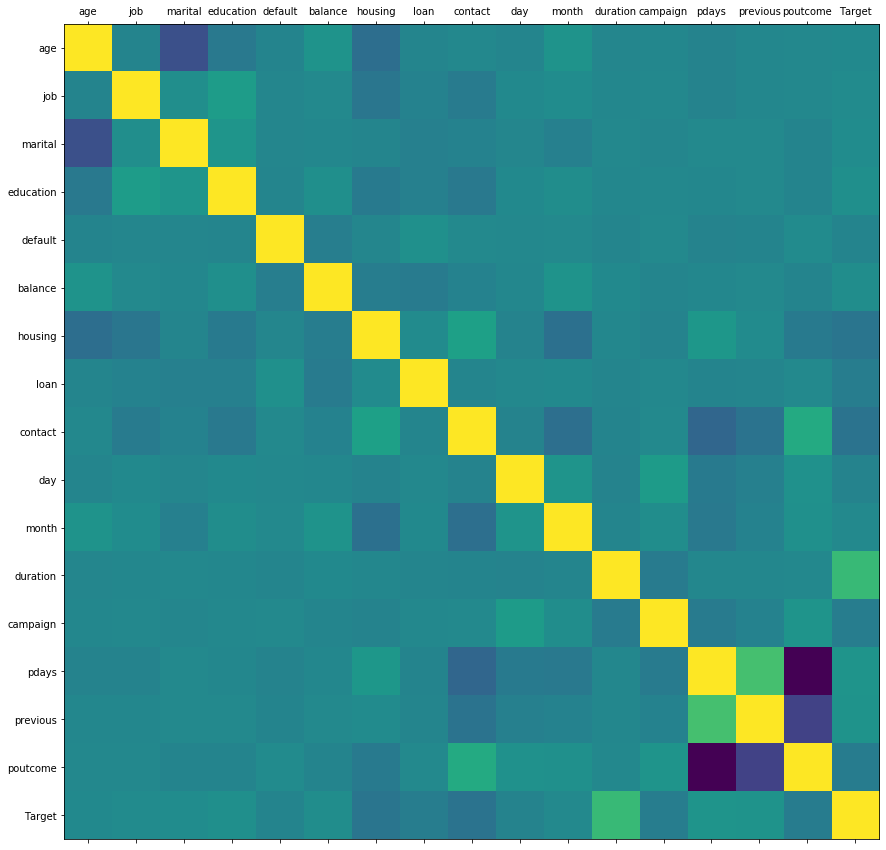

In [21]:
#Plotting a heat map of the above correlation:
def plot_corr(data, size = 15):
    corr = data.corr()
    fig, ax = mp.subplots(figsize = (size, size))
    ax.matshow(corr)
    mp.xticks(range(len(corr.columns)), corr.columns)
    mp.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(dataSet)

**=======================================================================================================================**
**=======================================================================================================================**

From the above correlations map, to train the model we'll drop the attribute age, default, day and month as they have very less correlation with target column.|
Now splitting the above dataSet to train KNN and Naive Bayes model that we'll use further in the ensemble technique.

In [22]:
X_Values = dataSet.drop(['age','default','day','month','Target'],axis=1)
Y_Values = dataSet['Target']

x_train,x_test,y_train,y_test = train_test_split(X_Values,Y_Values,test_size = 0.3, random_state = 1)

In [23]:
#Training a Logistic Model with the above data:

logisticReg = LogisticRegression(solver = 'liblinear')
logisticReg.fit(x_train,y_train)
pred = logisticReg.predict(x_test)
logisticReg.score(x_test,y_test)

0.8903715718077263

In [24]:
classification_report_of_model(y_test, pred)

The classificaiton report of the model is: 
              precision    recall  f1-score   support

           1       0.56      0.21      0.30      1551
           0       0.91      0.98      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



In [25]:
#Training a KNN model with the above data:

KNNmodel = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNNmodel.fit(x_train,y_train)
pred = KNNmodel.predict(x_test)
KNNmodel.score(x_test,y_test)

0.8801975818342672

In [26]:
classification_report_of_model(y_test, pred)

The classificaiton report of the model is: 
              precision    recall  f1-score   support

           1       0.46      0.30      0.36      1551
           0       0.91      0.96      0.93     12013

    accuracy                           0.88     13564
   macro avg       0.69      0.63      0.65     13564
weighted avg       0.86      0.88      0.87     13564



In [27]:
#Training a Naive Bayes model with the above data:

naiveBmodel = GaussianNB()
naiveBmodel.fit(x_train,y_train)
pred = naiveBmodel.predict(x_test)
naiveBmodel.score(x_test,y_test)

0.846652904747862

In [28]:
classification_report_of_model(y_test, pred)

The classificaiton report of the model is: 
              precision    recall  f1-score   support

           1       0.35      0.41      0.38      1551
           0       0.92      0.90      0.91     12013

    accuracy                           0.85     13564
   macro avg       0.64      0.65      0.64     13564
weighted avg       0.86      0.85      0.85     13564



Now creating a decision tree from the above dataSet

In [29]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(x_train,y_train)
dTree.score(x_test, y_test)

0.8574166912415216

In [30]:
#Creating a model with max depth of 6 that reduces the overfitting of the model.
dTree = DecisionTreeClassifier(criterion='gini',max_depth=6, random_state=1)
dTree.fit(x_train,y_train)
pred = dTree.predict(x_test)
dTree.score(x_test, y_test)

0.9024624004718372

In [31]:
classification_report_of_model(y_test, pred)

The classificaiton report of the model is: 
              precision    recall  f1-score   support

           1       0.63      0.36      0.46      1551
           0       0.92      0.97      0.95     12013

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



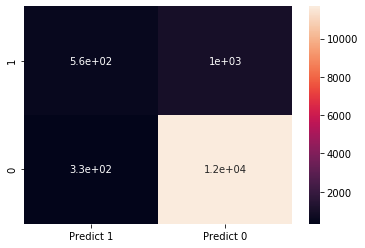

In [32]:
create_confusionMat(y_test, pred)

From the above models, we can conclude that for the dataSet, the best suitable models with highest f1 score is Logistic Regression model and the Decision Tree. Hence we'll consider these models for futher processes.

We will be creating 2 Bagging models: 
1. With base interpreter as Logistic Regression Model
2. With base interpreter as dTree.

In [33]:
#Bagging with Logistic Regression Model
logRegBag = BaggingClassifier(base_estimator=logisticReg, n_estimators=50, random_state=1)
logRegBag.fit(x_train,y_train)
pred = logRegBag.predict(x_test)
logRegBag.score(x_test, y_test)

0.8908139191978768

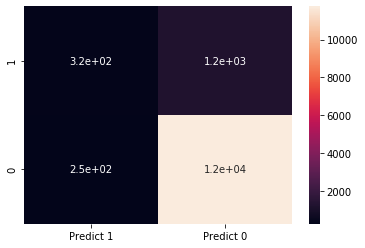

In [34]:
create_confusionMat(y_test,pred)

In [35]:
classification_report_of_model(y_test, pred)

The classificaiton report of the model is: 
              precision    recall  f1-score   support

           1       0.56      0.21      0.30      1551
           0       0.91      0.98      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



In [36]:
cal_AUC(logRegBag)

The area under the curve is: 0.8688909602175549


0.8688909602175549

**=======================================================================================================================**

In [37]:
#Bagging with Decision Tree
dTreeBag = BaggingClassifier(base_estimator=dTree, n_estimators=50, random_state=1)
dTreeBag.fit(x_train,y_train)
pred = dTree.predict(x_test)
dTree.score(x_test, y_test)

0.9024624004718372

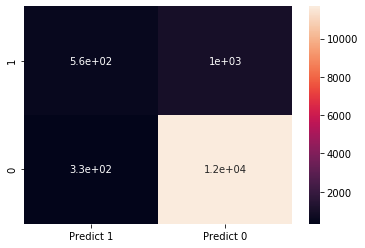

In [38]:
create_confusionMat(y_test,pred)

In [39]:
classification_report_of_model(y_test, pred)

The classificaiton report of the model is: 
              precision    recall  f1-score   support

           1       0.63      0.36      0.46      1551
           0       0.92      0.97      0.95     12013

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [40]:
cal_AUC(dTreeBag)

The area under the curve is: 0.8916358771657376


0.8916358771657376

Hence, from the above Bagging models the **Decision Tree bagging model** is to be considered as it has highest F1 Score and a score of 90.24 %

**========================================================================================================================**

Now, creating Boosting models that is:
1. Adaptive Boosting Model
2. Gradient Boosting Model

In [41]:
#Adaptive Boosting model of the given dataSet:
adaBoostModel = AdaBoostClassifier(n_estimators=20, random_state=1)
adaBoostModel.fit(x_train, y_train)
pred = adaBoostModel.predict(x_test)
adaBoostModel.score(x_test, y_test)

0.8934680035387791

In [42]:
classification_report_of_model(y_test, pred)

The classificaiton report of the model is: 
              precision    recall  f1-score   support

           1       0.56      0.32      0.41      1551
           0       0.92      0.97      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.74      0.64      0.67     13564
weighted avg       0.88      0.89      0.88     13564



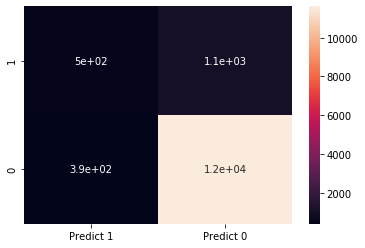

In [43]:
create_confusionMat(y_test, pred)

In [44]:
cal_AUC(adaBoostModel)

The area under the curve is: 0.885900096515901


0.885900096515901

In [45]:
#Gradient Boosting Model of the dataSet:
gradBoostModel = GradientBoostingClassifier(n_estimators=50, random_state=1)
gradBoostModel.fit(x_train, y_train)
pred = gradBoostModel.predict(x_test)
gradBoostModel.score(x_test, y_test)

0.9014302565614863

In [46]:
classification_report_of_model(y_test, pred)

The classificaiton report of the model is: 
              precision    recall  f1-score   support

           1       0.63      0.33      0.43      1551
           0       0.92      0.98      0.95     12013

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



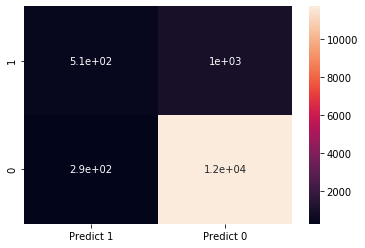

In [47]:
create_confusionMat(y_test, pred)

In [48]:
cal_AUC(gradBoostModel)

The area under the curve is: 0.896784447409568


0.896784447409568

From the Boosting models, the **gradient bossting** is better than adaptive boosting as the f1 score is high as well as the score is 90.14

**=========================================================================================================================**

Now, let us create a random forest model of the given data Set. We will be using the already created decision tree model 'dTree' for this purpose.

In [49]:
#The random forest model:
rf_model = RandomForestClassifier(n_estimators=59, random_state=1)
rf_model.fit(x_train, y_train)
pred = rf_model.predict(x_test)
rf_model.score(x_test, y_test)

0.8984812739604836

In [50]:
classification_report_of_model(y_test, pred)

The classificaiton report of the model is: 
              precision    recall  f1-score   support

           1       0.59      0.38      0.46      1551
           0       0.92      0.97      0.94     12013

    accuracy                           0.90     13564
   macro avg       0.76      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564



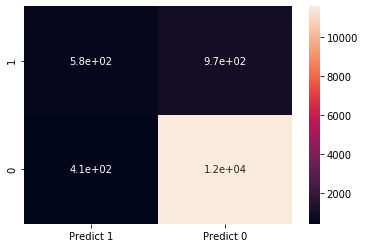

In [51]:
create_confusionMat(y_test, pred)

In [52]:
cal_AUC(rf_model)

The area under the curve is: 0.8866539810756271


0.8866539810756271

From the above models, summarizing the scores:
    
| Sr. No | Model | Score | AUC |
| --- | --- | --- | --- |
| 1 | Bagging with Decision Tree | 89.08 | 89.16 |
| 2 | Gradient Boosting | 90.14 | 89.67 |
| 3 | Random Forest | 89.84 | 88.66 |

Thus from the above table, for this dataSet the best model seems to be the Gradient Boosting model to predict that the customer will subscribe for the term deposit with the bank or not.

**========================================================================================================================**
**========================================================================================================================**


The above section was to create models with the dataSet where outliers were not handled. Treating the outliers mean to remove the outliers from the dataSet and prepare the model without them. Thus, in the following section we'll prepare models of the data Set where outliers are treated.

Now we've already prepared a dataSet without outliers in data analysis and cleansing section. Lets work out with the same.

In [53]:
dataSet_withoutOutliers.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,Target,pdays,previous
0,58,4,2,3,1,2143,2,1,3,5,5,261,1,3,0,-1,0
1,44,9,3,2,1,29,2,1,3,5,5,151,1,3,0,-1,0
2,33,2,2,2,1,2,2,2,3,5,5,76,1,3,0,-1,0
3,47,1,2,4,1,1506,2,1,3,5,5,92,1,3,0,-1,0
4,33,11,3,4,1,1,1,1,3,5,5,198,1,3,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4,2,3,1,1428,1,1,0,16,11,333,2,3,0,-1,0
45202,34,0,3,2,1,557,1,1,0,17,11,224,1,3,1,-1,0
45203,23,8,3,3,1,113,1,1,0,17,11,266,1,3,1,-1,0
45205,25,9,3,2,1,505,1,2,0,17,11,386,2,3,1,-1,0


**========================================================================================================================**
Now splitting the above dataSet with no outliers to train the models:

In [54]:
X_Values = dataSet_withoutOutliers.drop(['age','default','day','month','Target'],axis=1)
Y_Values = dataSet_withoutOutliers['Target']

x_train,x_test,y_train,y_test = train_test_split(X_Values,Y_Values,test_size = 0.3, random_state = 1)

In [55]:
X_Values

,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,pdays,previous
0,4,2,3,2143,2,1,3,261,1,3,-1,0
1,9,3,2,29,2,1,3,151,1,3,-1,0
2,2,2,2,2,2,2,3,76,1,3,-1,0
3,1,2,4,1506,2,1,3,92,1,3,-1,0
4,11,3,4,1,1,1,3,198,1,3,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45198,4,2,3,1428,1,1,0,333,2,3,-1,0
45202,0,3,2,557,1,1,0,224,1,3,-1,0
45203,8,3,3,113,1,1,0,266,1,3,-1,0
45205,9,3,2,505,1,2,0,386,2,3,-1,0


In [ ]:
#Training a Logistic Model with the above data:

logisticReg = LogisticRegression(solver = 'liblinear')
logisticReg.fit(x_train,y_train)
pred = logisticReg.predict(x_test)
logisticReg.score(x_test,y_test)

In [ ]:
classification_report_of_model(y_test, pred)

In [ ]:
#Training a KNN model with the above data:

KNNmodel = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNNmodel.fit(x_train,y_train)
pred = KNNmodel.predict(x_test)
KNNmodel.score(x_test,y_test)

In [ ]:
classification_report_of_model(y_test, pred)

In [ ]:
#Training a Naive Bayes model with the above data:

naiveBmodel = GaussianNB()
naiveBmodel.fit(x_train,y_train)
pred = naiveBmodel.predict(x_test)
naiveBmodel.score(x_test,y_test)

In [ ]:
classification_report_of_model(y_test, pred)

Now creating a decision tree from the above dataSet

In [ ]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(x_train,y_train)
dTree.score(x_test, y_test)

In [ ]:
#Creating a model with max depth of 6 that reduces the overfitting of the model.
dTree = DecisionTreeClassifier(criterion='gini',max_depth=6, random_state=1)
dTree.fit(x_train,y_train)
pred = dTree.predict(x_test)
dTree.score(x_test, y_test)

In [ ]:
classification_report_of_model(y_test, pred)

In [ ]:
create_confusionMat(y_test, pred)

From the above models, we can conclude that for the dataSet, the best suitable models with highest f1 score is Logistic Regression model and the Decision Tree. Hence we'll consider these models for futher processes.

We will be creating 2 Bagging models: 
1. With base interpreter as Logistic Regression Model
2. With base interpreter as dTree.

In [ ]:
#Bagging with Logistic Regression Model
logRegBag = BaggingClassifier(base_estimator=logisticReg, n_estimators=50, random_state=1)
logRegBag.fit(x_train,y_train)
pred = logRegBag.predict(x_test)
logRegBag.score(x_test, y_test)

Here we can see the bagging of logistic regression is slightly greater than the basic regression model.

In [ ]:
create_confusionMat(y_test,pred)

In [ ]:
classification_report_of_model(y_test, pred)

In [ ]:
cal_AUC(logRegBag)

**=======================================================================================================================**

In [ ]:
#Bagging with Decision Tree
dTreeBag = BaggingClassifier(base_estimator=dTree, n_estimators=50, random_state=1)
dTreeBag.fit(x_train,y_train)
pred = dTree.predict(x_test)
dTree.score(x_test, y_test)

In [ ]:
create_confusionMat(y_test,pred)

In [ ]:
classification_report_of_model(y_test, pred)

In [ ]:
cal_AUC(dTreeBag)

Hence, from the above Bagging models the **Decision Tree bagging model** is to be considered as it has highest F1 Score and a AUC of 85.37 %

**========================================================================================================================**

Now, creating Boosting models that is:
1. Adaptive Boosting Model
2. Gradient Boosting Model

In [ ]:
#Adaptive Boosting model of the given dataSet:
adaBoostModel = AdaBoostClassifier(n_estimators=20, random_state=1)
adaBoostModel.fit(x_train, y_train)
pred = adaBoostModel.predict(x_test)
adaBoostModel.score(x_test, y_test)

In [ ]:
classification_report_of_model(y_test, pred)

In [ ]:
create_confusionMat(y_test, pred)

In [ ]:
cal_AUC(adaBoostModel)

In [ ]:
#Gradient Boosting Model of the dataSet:
gradBoostModel = GradientBoostingClassifier(n_estimators=50, random_state=1)
gradBoostModel.fit(x_train, y_train)
pred = gradBoostModel.predict(x_test)
gradBoostModel.score(x_test, y_test)

In [ ]:
classification_report_of_model(y_test, pred)

In [ ]:
create_confusionMat(y_test, pred)

In [ ]:
cal_AUC(gradBoostModel)

From the Boosting models, the **gradient bossting** is better than adaptive boosting as the f1 score is high as well as the score is 94.36

**=========================================================================================================================**

Now, let us create a random forest model of the given data Set. We will be using the already created decision tree model 'dTree' for this purpose.

In [ ]:
#The random forest model:
rf_model = RandomForestClassifier(n_estimators=59, random_state=1)
rf_model.fit(x_train, y_train)
pred = rf_model.predict(x_test)
rf_model.score(x_test, y_test)

In [ ]:
classification_report_of_model(y_test, pred)

In [ ]:
create_confusionMat(y_test, pred)

In [ ]:
cal_AUC(rf_model)

From the above models, summarizing the scores:
    
| Sr. No | Model | Score | AUC |
| --- | --- | --- | --- |
| 1 | Bagging with Decision Tree | 94.34 | 84.74 |
| 2 | Gradient Boosting | 94.36 | 86.05 |
| 3 | Random Forest | 93.97 | 81.11 |

Thus from the above table, for this dataSet without the outliers, the best model seems to be the **Gradient Boosting model** to predict that the customer will subscribe for the term deposit with the bank or not.

**========================================================================================================================**
**========================================================================================================================**

**Now, let us build a decision tree and a random forest from the dataSet without outliers where we won't consider the attribute '*duration*' in order to get a realistic predictive model, as mentioned in the problem statement.**

In [ ]:
X_Val = dataSet_withoutOutliers.drop(['age','default','day','month','Target','duration'],axis=1)
Y_Val = dataSet_withoutOutliers['Target']

x_train,x_test,y_train,y_test = train_test_split(X_Val,Y_Val,test_size = 0.3, random_state = 1)

In [ ]:
#Creating a random forest:
rf_realistic = RandomForestClassifier(n_estimators = 50, random_state=1)
rf_realistic.fit(x_train, y_train)
rf_realistic.score(x_test,y_test)

In [ ]:
pred = rf_realistic.predict(x_test)
create_confusionMat(y_test,pred)

In [ ]:
classification_report_of_model(y_test, pred)

In [ ]:
cal_AUC(rf_realistic)

In [ ]:
#Creating a Decision Tree.
dTree_realistic = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree_realistic.fit(x_train,y_train)
dTree_realistic.score(x_test,y_test)

In [ ]:
pred = dTree_realistic.predict(x_test)
create_confusionMat(y_test,pred)

In [ ]:
classification_report_of_model(y_test, pred)

In [ ]:
cal_AUC(dTree_realistic)

Thus from the above 2 modelswe find that using a realistic approach that is eliminating attribute 'duration', the obvious indicator to the target as 'Yes', the scores for dTree and random forest reduces, especially their Area under the curve.